1. Prepare data -------------------------------------------------------------------------- 

1.1 Load data ----------------------------------------------------------------------------
   ↑ 100% 

General information of the dataset ------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign 

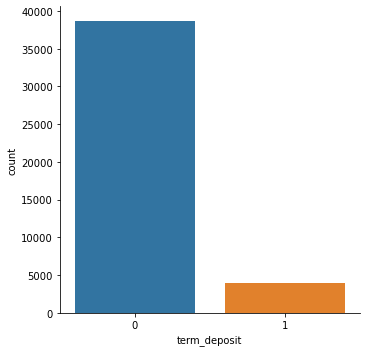

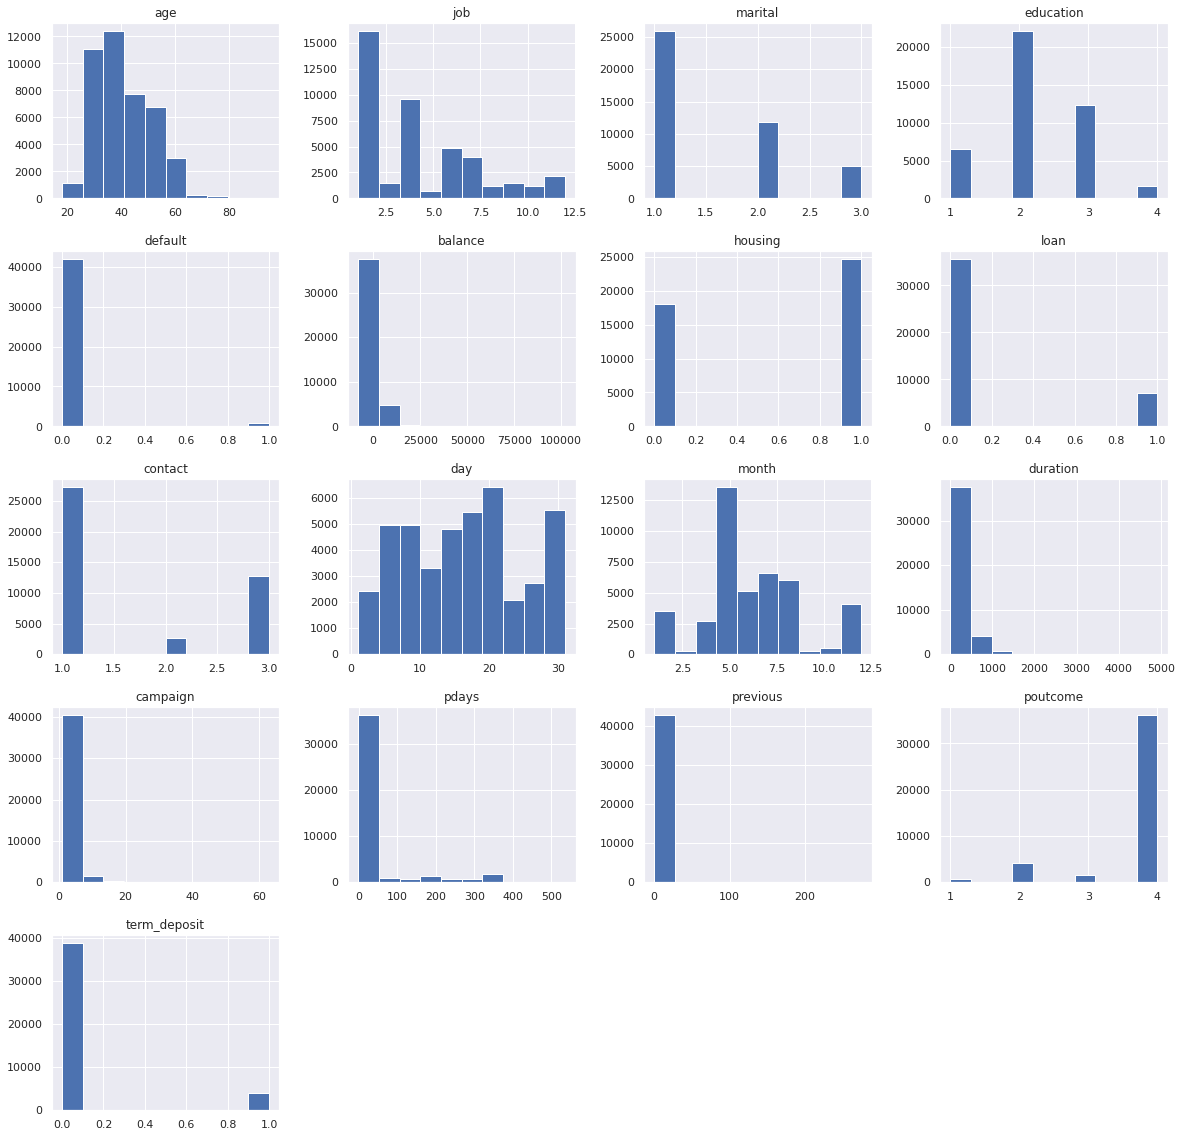

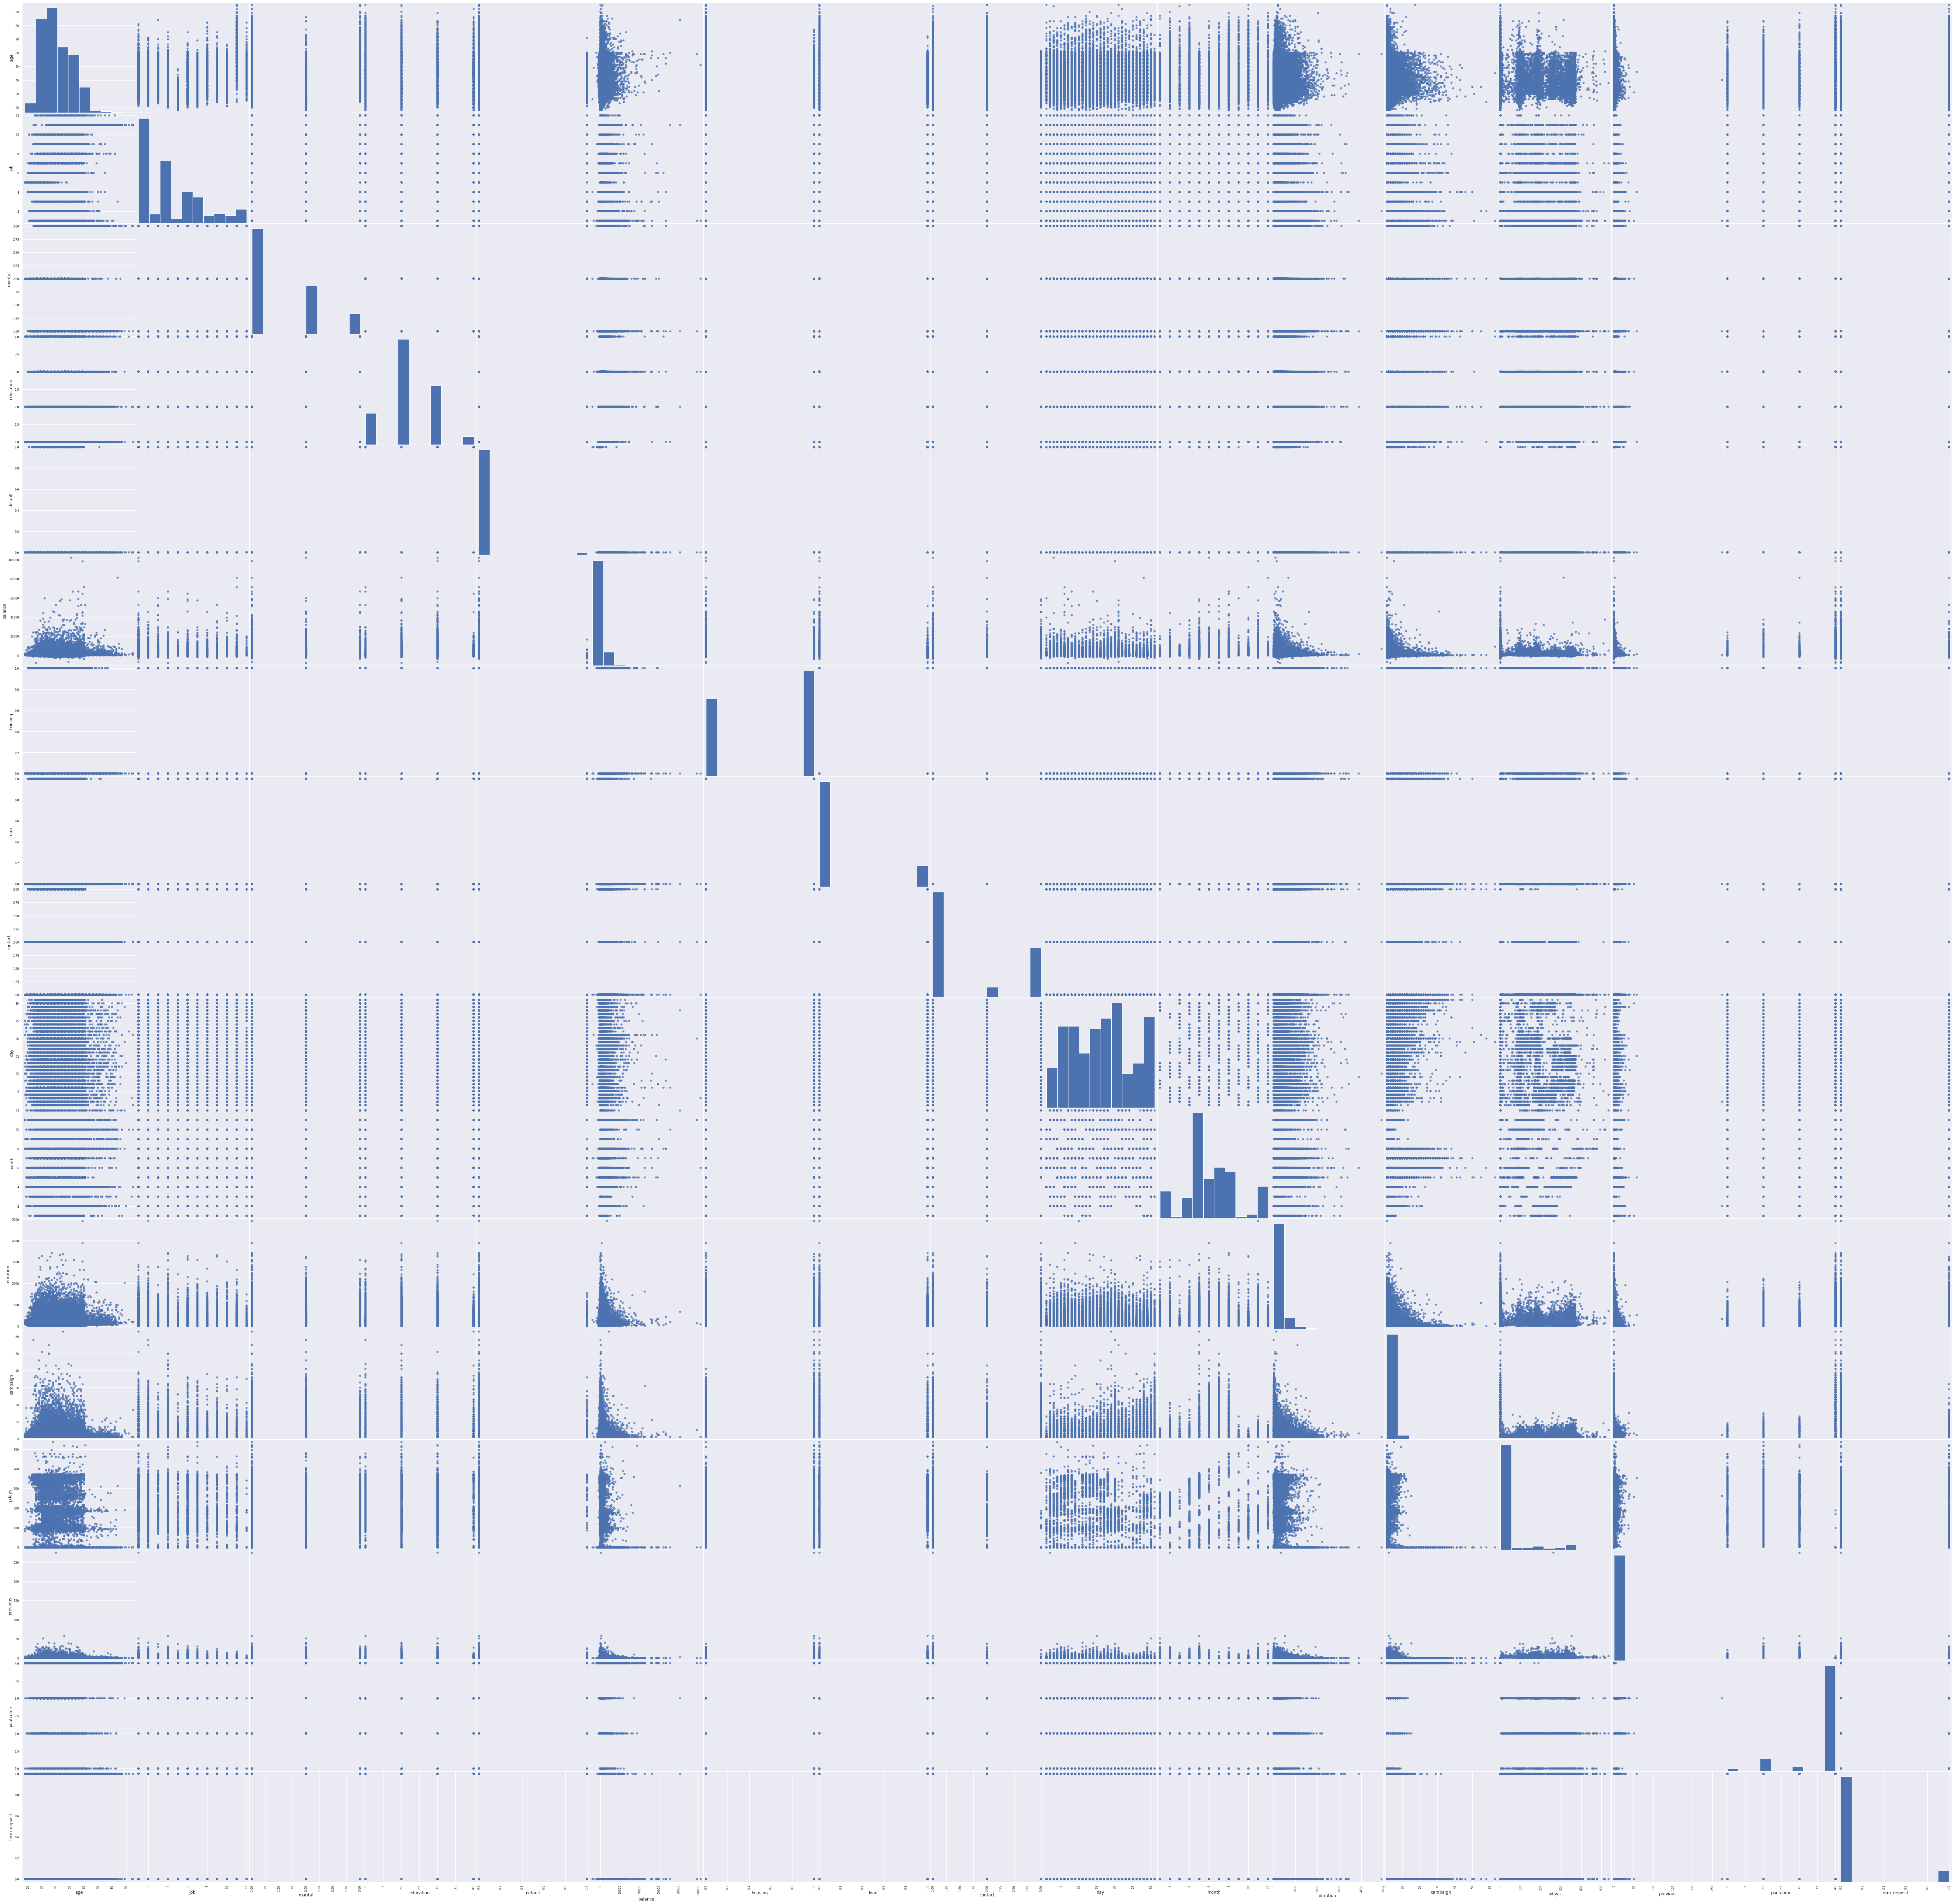

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct  9 18:58:11 2021

@author: juana
"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn import tree
from prettytable import PrettyTable

class Bank():
    
#%%
    def __init__(self, path, filename):
        """
        Default Constructor.

        Parameters
        ----------
        path : string
            CSV file path.
        filename : string
            CSV filename.

        Returns
        -------
        None.

        """
        self._path = path
        self._filename = filename
        self._bank_data = pd.DataFrame()
        
#%%        
    def loadfile(self):
        """
        Load CSV file into dataframe.

        Returns
        -------
        None.

        """
        filename = os.path.join(self._path, self._filename)
        self._bank_data = pd.read_csv(filename)
        
#%%
    def showGeneralInformation(self):
        """
        Show the general information of the dataset.

        Returns
        -------
        None.

        """
        print("General information of the dataset ".ljust(90, '-'), "\n")
        print(self._bank_data.info())
        print("\n")

#%%        
    def showDF(self):
        """
        Show the dataframe.

        Returns
        -------
        None.

        """
        print("Show the dataset ".ljust(90, '-'), "\n")
        print(self._bank_data)
        print("\n")
        
#%%        
    def showDescriptiveStatistics(self):
        """
        Show descriptive statistics of numerical data.

        Returns
        -------
        None.

        """
        print("Shows descriptive statistics of numerical data ".ljust(90, '-'), "\n")
        print(self._bank_data.describe())
        print("\n")     
    
#%%
    def showDataHead(self):
        """
        Show the first five registers in the data set.

        Returns
        -------
        TYPE
            True if a NaN value was found.

        """
        print("Shows the first five registers in the data set ".ljust(90, '-'), "\n")
        print(self._bank_data.head())
        print("\n") 

#%%        
    def uniqueValues(self):
        """
        Get the unique values.
    
        Returns
        -------
        Numpy array
            The unique values array.

        """
        return self._bank_data.apply(lambda x: len(x.unique()))  

#%%        
    def uniqueValuesPerColumn(self, column):
        """
        Get the unique values of the column.
        
        Parameters
        ----------
        
        column : int
            Species column.

        Returns
        -------
        Numpy array
            The unique values array.

        """
        print(column, ':')
        return self._bank_data[column].unique()  

#%%        
    def replaceTags(self, column):
        """
        Replace the values of the column to numerical values.

        Returns
        -------
        None.

        """
        if column == 'job':
            values_cross = {
                "job": {
                    'management': 1,
                    'technician': 2,
                    'entrepreneur': 3,
                    'blue-collar': 4,
                    'student': 5,
                    'admin.': 6,
                    'services': 7,
                    'housemaid': 8,
                    'self-employed': 9,
                    'unemployed': 10,
                    'retired': 11,
                    'unknown': 12
                }
            }
            
        elif column == 'marital':
            values_cross = {
                "marital": {
                    'married': 1,
                    'single': 2,
                    'divorced': 3
                }
            }
            
        elif column == 'education':
            values_cross = {
                "education": {
                    'primary': 1,
                    'secondary': 2,
                    'tertiary': 3,
                    'unknown': 4
                }
            }
            
        elif column == 'default':
            values_cross = {
                "default": {
                    'no': 0,
                    'yes': 1
                }
            }
            
        elif column == 'housing':
            values_cross = {
                "housing": {
                    'no': 0,
                    'yes': 1
                }
            }
            
        elif column == 'loan':
            values_cross = {
                "loan": {
                    'no': 0,
                    'yes': 1
                }
            }
            
        elif column == 'contact':
            values_cross = {
                "contact": {
                    'cellular': 1,
                    'telephone': 2,
                    'unknown': 3
                }
            }
            
        elif column == 'month':
            values_cross = {
                "month": {
                    'jan': 1,
                    'feb': 2,
                    'mar': 3,
                    'apr': 4,
                    'may': 5,
                    'jun': 6,
                    'jul': 7,
                    'aug': 8,
                    'sep': 9,
                    'oct': 10,
                    'nov': 11,
                    'dec': 12,
                }
            }
            
        elif column == 'poutcome':
            values_cross = {
                "poutcome": {
                    'success': 1,
                    'failure': 2,
                    'other': 3,
                    'unknown': 4
                }
            }
            
        elif column == 'term_deposit':
            values_cross = {
                "term_deposit": {
                    'no': 0,
                    'yes': 1
                }
            }
            
        self._bank_data.replace(values_cross, inplace = True)    

#%%
    def checkNaN(self):
        """
        Check if exist NaN values.

        Returns
        -------
        TYPE
            True if a NaN value was found.

        """
        return self._bank_data.isna().sum()    

#%%
    def plotUsingSNS(self, column):
        """
        Plot using SNS.

        Parameters
        ----------
        column : int
            Potability column.

        Returns
        -------
        None.

        """
        sns.catplot(
            x = column, 
            data = self._bank_data, 
            kind = "count"
        )
        
        plt.show()
 
    
#%%
    def plotHist(self):
        """
        Plot using hist.

        Returns
        -------
        None.

        """
        sns.set(rc = {'figure.figsize': (20, 20)})
        self._bank_data.hist()  
        
        plt.show()

#%%
    def plotScatterMatrix(self):
        """
        Plot scatter matrix.

        Returns
        -------
        None.

        """
        pd.plotting.scatter_matrix(
            self._bank_data,
            figsize = (100, 100),
            marker = 'o',
            alpha = 0.8
        )   
        
        plt.show()
        
#%%        
    def correlationMatrix(self, method):
        """
        Show correlation matrix.

        Returns
        -------
        None.

        """
        sns.set(rc = {'figure.figsize': (10, 10)})
        sns.heatmap(self._bank_data.corr(method = method), annot = True)
           
        plt.show()   
        
#%%
    def splitData(self, column):
        """
        Split data to get the training data.

        Parameters
        ----------
        column : int
            term_deposit column.

        Returns
        -------
        None.

        """
        x = self._bank_data.drop(columns = column)
        y = self._bank_data[column]
        
        self._x_train, self._x_test, self._y_train, self._y_test = train_test_split(
            x, y, test_size = 0.2, random_state = 0
        )
        
        print("x_train: ".ljust(90, '-'), "\n")
        print(self._x_train)
        print("\n" + "x_test: ".ljust(90, '-'), "\n")
        print(self._x_test)
        print("\n" + "y_train: ".ljust(90, '-'), "\n")
        print(self._y_train)
        print("\n" + "y_test: ".ljust(90, '-'), "\n")
        print(self._y_test)    
    
#%%
    def linearRegressionModel(self):
        """
        Apply linear regression model.

        Returns
        -------
        None.

        """
        warnings.filterwarnings('ignore')
        
        self._model = LinearRegression()
        self._model.fit(self._x_train, self._y_train)

#%%
    def logisticRegressionModel(self):
        """
        Apply logistic regression model.

        Returns
        -------
        None.

        """
        warnings.filterwarnings('ignore')
        
        self._model = LogisticRegression(
            solver='lbfgs', max_iter=1000
        )
        self._model.fit(self._x_train, self._y_train)

#%%        
    def decisionTreeModel(self):
        """
        Apply decision tree model.

        Returns
        -------
        None.

        """
        self._dTree = DecisionTreeClassifier(max_depth = 10)
        self._dTree.fit(self._x_train, self._y_train)
        
#%%        
    def svcModel(self):
        """
        Apply SVC model.

        Returns
        -------
        None.

        """
        self._model = SVC()
        self._model.fit(self._x_train, self._y_train)
        
#%%        
    def neighborsModel(self):
        """
        Apply neighbors model.

        Returns
        -------
        None.

        """
        self._model = KNeighborsClassifier(
            n_neighbors = 50
        )
        self._model.fit(self._x_train, self._y_train) 
        
#%%
    def prediction(self):
        """
        Get the predictions with the test value.

        Returns
        -------
        None.

        """
        if model == 'Logistic':
            self._y_pred = self._model.predict(self._x_test)
            
        elif model == 'Tree':  
            self._y_pred = self._dTree.predict(self._x_test)
            
        elif model == 'SVC':  
            self._y_pred = self._model.predict(self._x_test)
            
        elif model == 'Neighbors':
            self._y_pred = self._model.predict(self._x_test)
            
        elif model == 'Linear':
            self._y_pred = self._model.predict(self._x_test)
        
        print(self._y_pred)

#%%        
    def confusionMatrix(self):
        """
        Show confusion matrix comparing test and predictions.

        Returns
        -------
        None.

        """
        self._cm = confusion_matrix(self._y_test, self._y_pred)
        
#%%
    def plotMatrixPrettier(self):
        """
        Show confusion matrix with sns comparing test and predictions.

        Returns
        -------
        None.

        """
        sns.set(rc = {'figure.figsize': (6, 6)})
        group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
        group_counts = ["{0: 0.0f}".format(value) for value in self._cm.flatten()]
        group_percentages = ["{0: .2%}".format(value) for value in self._cm.flatten() / np.sum(self._cm)]
        
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        class_names = ['Not Potability', 'Potability']
        dataframe = pd.DataFrame(self._cm, index = class_names, columns = class_names)
        sns.heatmap(dataframe, annot = True, fmt = '', cmap = 'Blues')
        
        plt.show()
        
#%%        
    def showScoreTrain(self):
        """
        Show the score train.

        Returns
        -------
        None.

        """
        if model == 'Logistic':
            result = self._model.score(
                    self._x_train, self._y_train
                ) * 100
            
        elif model == 'Tree':    
            result = self._dTree.score(
                    self._x_train, self._y_train
                ) * 100
            
        elif model == 'SVC':
            result = self._model.score(
                    self._x_train, self._y_train
                ) * 100
            
        elif model == 'Neighbors':
            result = self._model.score(
                    self._x_train, self._y_train
                ) * 100
            
        elif model == 'Linear':
            result = self._model.score(
                    self._x_train, self._y_train
                ) * 100
            
        print("Model score: ", result)
        return(result)
    
#%%        
    def showScoreTest(self):
        """
        Show the score test.

        Returns
        -------
        None.

        """
        if model == 'Logistic':
            result = self._model.score(
                    self._x_test, self._y_test
                ) * 100
            
        elif model == 'Tree':    
            result = self._dTree.score(
                    self._x_test, self._y_test
                ) * 100
            
        elif model == 'SVC':
            result = self._model.score(
                    self._x_test, self._y_test
                ) * 100
            
        elif model == 'Neighbors':
            result = self._model.score(
                    self._x_test, self._y_test
                ) * 100
            
        elif model == 'Linear':
            result = self._model.score(
                    self._x_test, self._y_test
                ) * 100
            
        print("Model score: ", result)
        return(result)            
            
#%%        
    def showAccuracy(self):
        """
        Show the accuracy.

        Returns
        -------
        None.

        """
        result = accuracy_score(
                self._y_test, self._y_pred
            ) * 100
        
        print("Model acurracy: ", result)
        
        return(result)
    
#%%        
    def showPrecisionScore(self):
        """
        Show precision score.

        Returns
        -------
        None.

        """
        result = precision_score(
                self._y_test, 
                self._y_pred, 
                average='macro'
            ) * 100
        
        print("Precision score: ", result)
        
        return(result)
          
#%%        
    def showCalculateError(self):
        """
        Calculate porcentual error.

        Returns
        -------
        None.

        """
        self._error = np.sqrt(
            mean_squared_error(
                self._y_test, self._y_pred
            ) * 100
        )
        print("Porcentual error: %f" % self._error)
        
        return(self._error)

#%%        
    def showMeanError(self):
        """
        Calculate porcentual error.

        Returns
        -------
        None.

        """
        self._error = mean_squared_error(
                self._y_test, self._y_pred
        ) * 100
        
        print("Mean squared error: %f" % self._error)
        
        return(self._error)
       
#%%
    def prettyTable(self, model, train, test, accuracy, precision, title1, title2):
        """
        Show the results.
    
        Returns
        -------
        None.
    
        """
        myTable = PrettyTable(["Model", "Training score", "Testing score", title1, title2])  
        myTable.add_row([model, train, test, accuracy, precision])
        print(myTable)        

#%%
def prepareData():
    """
    Prepare the data.

    Returns
    -------
    None.

    """
    print("1. Prepare data ".ljust(90, '-'), "\n")
    
    #1.1 Load data.
    print("1.1 Load data ".ljust(90, '-'))
    bank.loadfile()
    print("   ↑ 100% \n")
    
    bank.showGeneralInformation()
    
    bank.showDF()
    
    bank.showDataHead()
    
    bank.showDescriptiveStatistics()
    
    #1.2 Check the different values that exist.
    print("1.2. Check the different values that exist".ljust(90, '-'), "\n")
    print(bank.uniqueValues())
    print("\n")
    
    #1.3 Check the different values that exist.
    print("1.3. Check the different values of the column that exist".ljust(90, '-'), "\n")
    print(bank.uniqueValuesPerColumn('job'), '\n')
    print(bank.uniqueValuesPerColumn('marital'), '\n')
    print(bank.uniqueValuesPerColumn('education'), '\n')
    print(bank.uniqueValuesPerColumn('default'), '\n')
    print(bank.uniqueValuesPerColumn('housing'), '\n')
    print(bank.uniqueValuesPerColumn('loan'), '\n')
    print(bank.uniqueValuesPerColumn('contact'), '\n')
    print(bank.uniqueValuesPerColumn('month'), '\n')
    print(bank.uniqueValuesPerColumn('poutcome'), '\n')
    print(bank.uniqueValuesPerColumn('term_deposit'), '\n')
    
    #1.4 Assign a different value to each value.
    print("1.4 Assign a different value to each value:".ljust(90, '-'), "\n")
    bank.replaceTags('job')
    bank.replaceTags('marital')
    bank.replaceTags('education')
    bank.replaceTags('default')
    bank.replaceTags('housing')
    bank.replaceTags('loan')
    bank.replaceTags('contact')
    bank.replaceTags('month')
    bank.replaceTags('poutcome')
    bank.replaceTags('term_deposit')
    
    bank.showDF()
    
    #1.5 Check for NaN data.
    print("1.5 Check for NaN data ".ljust(90, '-'), "\n")
    print(bank.checkNaN())
    print("\n")
    
    bank.showDataHead()
    
#%%    
def trainModel(model):
    """
    Train the model.

    Returns
    -------
    None.
    
    """
    print("2. Train the model ".ljust(90, '-'), "\n")

    #2.1 Graphics.
    print("2.1 Graphics: ".ljust(90, '-'), "\n")

    bank.plotUsingSNS('term_deposit')
    
    bank.plotHist()
    
    bank.plotScatterMatrix()
    
    # method = 'pearson', 'kendall', 'spearman'
    bank.correlationMatrix('kendall')
    
    #2.2 Split data.
    print("2.2 Split data: ".ljust(90, '-'), "\n")
    bank.splitData('term_deposit')
    print("\n")
    
    if model == 'Logistic':
        #2.3 Apply logistic regression model.
        print("2.3 Apply logistic regression model: ".ljust(90, '-'), "\n")
        bank.logisticRegressionModel()
        
    elif model == 'Tree': 
        #2.3 Apply desicion three classifier model.
        print("2.3 Apply desicion three classifier model: ".ljust(90, '-'), "\n")
        bank.decisionTreeModel()
        
    elif model == 'SVC': 
        #2.3 Apply SVC model.
        print("2.3 Apply SVC model: ".ljust(90, '-'), "\n")
        bank.svcModel()
    
    elif model == 'Neighbors':
        #2.3 Apply neighbors classifier model.
        print("2.3 Apply neighbors classifier model: ".ljust(90, '-'), "\n")
        bank.neighborsModel()
        
    elif model == 'Linear':
        #2.3 Apply neighbors classifier model.
        print("2.4 Apply linear regression model: ".ljust(90, '-'), "\n")
        bank.linearRegressionModel()
    
#%%
def testModel(model):
    """
    Test model.

    Parameters
    ----------
    model : string
        Model type.

    Returns
    -------
    None.

    """
    print("3. Test model ".ljust(90, '-'), "\n")
    
    #3.1 Predictions.
    print("3.1 Predictions: ".ljust(90, '-'), "\n")
    bank.prediction()
    print("\n")
    
    if model != 'Linear':
        #3.2 Confusion matrix.
        print("3.2 Confusion matrix: ".ljust(90, '-'), "\n")
        bank.confusionMatrix()
        print(bank._cm)
        print("\n")
        
        #3.3 Plot confusion matrix.
        print("3.3 Plot confusion matrix: ".ljust(90, '-'), "\n")
        bank.plotMatrixPrettier()
    
        #3.4.1 Show model score.
        print("3.4.1 Show model score train: ".ljust(90, '-'), "\n")
        train = bank.showScoreTrain()
        print("\n")
        
        #3.4.2 Show model score.
        print("3.4.2 Show model score test: ".ljust(90, '-'), "\n")
        test = bank.showScoreTest()
        print("\n") 
        
        #3.5 Show model acurracy.
        print("3.5 Show model acurracy: ".ljust(90, '-'), "\n")
        accuracy = bank.showAccuracy()
        print("\n")
        
        #3.6 Precision score
        print("3.6 Precision score: ".ljust(90, '-'), "\n")
        precision = bank.showPrecisionScore()
        print("\n")
        
        #3.7 Final results
        print("3.7 Final results: ".ljust(90, '-'), "\n")
        bank.prettyTable(model, train, test, accuracy, precision, "Accuracy", "Precision")
        print("\n")
    
    else:
        #3.2.1 Show model score.
        print("3.2.1 Show model score train: ".ljust(90, '-'), "\n")
        train = bank.showScoreTrain()
        print("\n")
        
        #3.2.2 Show model score.
        print("3.2.2 Show model score test: ".ljust(90, '-'), "\n")
        test = bank.showScoreTest()
        print("\n") 
        
        #3.3 Mean squared error
        print("3.3 Mean squared error: ".ljust(90, '-'), "\n")
        squared = bank.showMeanError()
        print("\n")
        
        #3.4 Porcentual error
        print("3.4 Porcentual error: ".ljust(90, '-'), "\n")
        porcentual = bank.showCalculateError()
        print("\n") 
        
        #3.5 Final results
        print("3.5 Final results: ".ljust(90, '-'), "\n")
        bank.prettyTable(model, train, test, squared, porcentual, "Mean squared error", "Porcentual error")
        print("\n")
    
#%%    
if __name__ == "__main__":
    global bank
    bank = Bank(".", "BankCustomerData.csv")
    #model = 'Linear'
    model = 'Logistic'
    #model = 'Tree'
    #model = 'SVC'
    #model = 'Neighbors'
    
    prepareData()
    trainModel(model)
    testModel(model)